In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
# === 1. Загрузка данных ===
url = "creditcard.csv"
df = pd.read_csv(url)

In [4]:
# === 2. Описание данных ===
print("Размер данных:")
df.shape

Размер данных:


(284807, 31)

In [5]:

print("\nТипы данных:\n")
df.info()



Типы данных:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [15]:

# Выбираем для анализа признак "Amount" (сумма транзакции)
col = "Amount"

data = df[col]
print("\nНазвание столбца: ", col)  
print("Минимальное значение:", data.min())
print("Максимальное значение:", data.max())
print("Среднее значение:", data.mean())
print("Медиана:", data.median())
print("Стандартное отклонение:", data.std())


Название столбца:  Amount
Минимальное значение: 0.0
Максимальное значение: 25691.16
Среднее значение: 88.34961925093134
Медиана: 22.0
Стандартное отклонение: 250.12010924018855


In [16]:
# === 3. Вариационный ряд ===

variation_series = np.sort(data)
print(f"\nПервые 20 элементов вариационного ряда для {col}:\n", variation_series[:20])


Первые 20 элементов вариационного ряда для Amount:
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


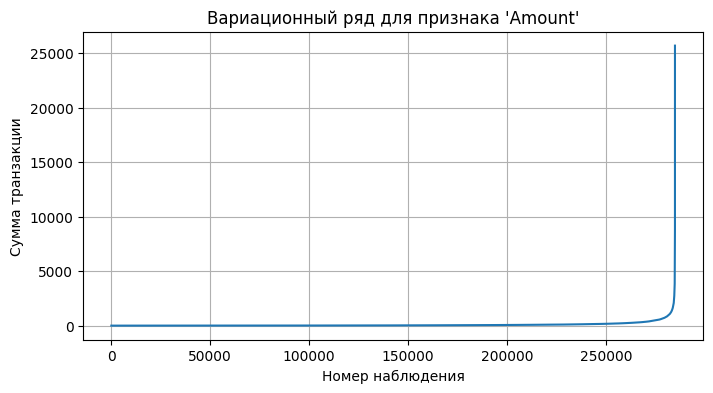

In [17]:
variation_series = np.sort(data)
plt.figure(figsize=(8,4))
plt.plot(variation_series)
plt.title(f"Вариационный ряд для признака '{col}'")
plt.xlabel("Номер наблюдения")
plt.ylabel("Сумма транзакции")
plt.grid(True)
plt.show()

In [18]:
# === 4. Расчёт числа интервалов по формуле Стерджесса ===
n = len(data)
k = int(1 + 3.322 * math.log10(n))
print(f"\nКоличество интервалов по формуле Стерджесса: k = {k}")


Количество интервалов по формуле Стерджесса: k = 19


In [11]:
# === 5. Интервальный вариационный ряд ===
min_val, max_val = data.min(), data.max()
interval_length = (max_val - min_val) / k

intervals = [min_val + i * interval_length for i in range(k + 1)]
counts, bins = np.histogram(data, bins=intervals)

interval_table = pd.DataFrame({
    "Интервал": [f"[{round(bins[i],2)}; {round(bins[i+1],2)})" for i in range(len(bins)-1)],
    "Частота": counts
})

print("\nИнтервальный вариационный ряд (первые 10 строк):")
print(interval_table.head(10))


Интервальный вариационный ряд (первые 10 строк):
              Интервал  Частота
0       [0.0; 1352.17)   283135
1   [1352.17; 2704.33)     1312
2    [2704.33; 4056.5)      246
3    [4056.5; 5408.67)       69
4   [5408.67; 6760.83)       19
5    [6760.83; 8113.0)       14
6    [8113.0; 9465.16)        4
7  [9465.16; 10817.33)        2
8  [10817.33; 12169.5)        2
9  [12169.5; 13521.66)        1


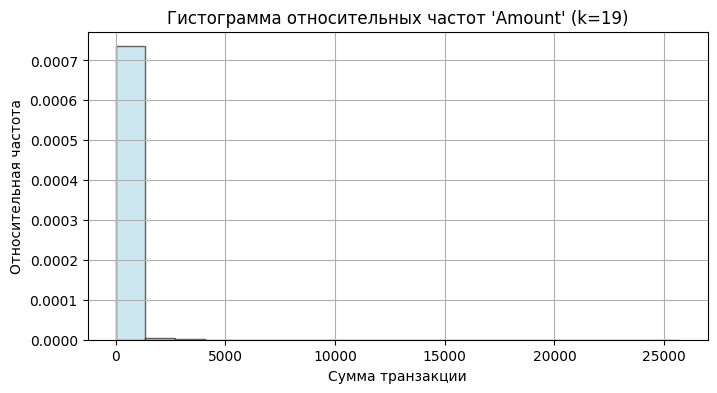

In [12]:
# === 6. Гистограмма (по формулам Стерджесса) ===
plt.figure(figsize=(8,4))
plt.hist(data, bins=k, density=True, alpha=0.6, color='lightblue', edgecolor='black')
plt.title(f"Гистограмма относительных частот 'Amount' (k={k})")
plt.xlabel("Сумма транзакции")
plt.ylabel("Относительная частота")
plt.grid(True)
plt.show()

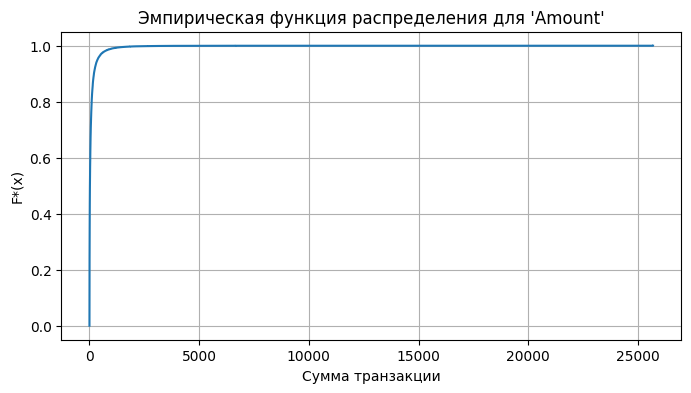

In [13]:
# === 7. Эмпирическая функция распределения ===
sorted_data = np.sort(data)
y = np.arange(1, n+1) / n

plt.figure(figsize=(8,4))
plt.step(sorted_data, y, where='post')
plt.title("Эмпирическая функция распределения для 'Amount'")
plt.xlabel("Сумма транзакции")
plt.ylabel("F*(x)")
plt.grid(True)
plt.show()

In [26]:
# === 8. Выборочные характеристики ===
for col in ['V1', 'V2', 'V3', 'Amount']:
    data = df[col]
    sample_mean = np.mean(data)
    sample_var = np.var(data, ddof=1)
    sample_std = np.std(data, ddof=1)
    variation_coeff = sample_std / sample_mean if sample_mean != 0 else np.nan

    print("\nВыборочные характеристики:", col)
    print(f"Выборочное среднее: {sample_mean:.4f}")
    print(f"Выборочная дисперсия: {sample_var:.4f}")
    print(f"Выборочное стандартное отклонение: {sample_std:.4f}")
    print(f"Коэффициент вариации: {variation_coeff:.4f}")


Выборочные характеристики: V1
Выборочное среднее: 0.0000
Выборочная дисперсия: 3.8365
Выборочное стандартное отклонение: 1.9587
Коэффициент вариации: 1666746915245399.2500

Выборочные характеристики: V2
Выборочное среднее: 0.0000
Выборочная дисперсия: 2.7268
Выборочное стандартное отклонение: 1.6513
Коэффициент вариации: 4878348899299085.0000

Выборочные характеристики: V3
Выборочное среднее: -0.0000
Выборочная дисперсия: 2.2990
Выборочное стандартное отклонение: 1.5163
Коэффициент вариации: -1099104501169552.3750

Выборочные характеристики: Amount
Выборочное среднее: 88.3496
Выборочная дисперсия: 62560.0690
Выборочное стандартное отклонение: 250.1201
Коэффициент вариации: 2.8310


In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.175161e-15,3.384974e-16,-1.379537e-15,2.094852e-15,1.021879e-15,1.494498e-15,-5.620335e-16,1.149614e-16,-2.414189e-15,...,1.628620e-16,-3.576577e-16,2.618565e-16,4.473914e-15,5.109395e-16,1.686100e-15,-3.661401e-16,-1.227452e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [38]:
amount = df['Amount'] 
# --- 1. Метод максимального правдоподобия ---
# Для экспоненциального распределения MLE для λ = 1 / mean(X)
lambda_mle = 1 / np.mean(amount)

# --- 2. Метод моментов ---
# Для экспоненциального распределения момент первого порядка = 1/λ
lambda_mom = 1 / np.mean(amount)

# --- 3. Байесовская оценка ---
# Пусть априорное распределение λ ~ Gamma(α0, β0)
alpha0, beta0 = 2, 200
alpha_post = alpha0 + len(amount)
beta_post = beta0 + np.sum(amount)
lambda_bayes = alpha_post / beta_post  # математическое ожидание апостериорного распределения

# --- Вывод ---
print(f"Метод максимального правдоподобия (MLE): λ = {lambda_mle:.5f}")
print(f"Метод моментов:                   λ = {lambda_mom:.5f}")
print(f"Байесовская оценка:               λ = {lambda_bayes:.5f}")


Метод максимального правдоподобия (MLE): λ = 0.01132
Метод моментов:                   λ = 0.01132
Байесовская оценка:               λ = 0.01132


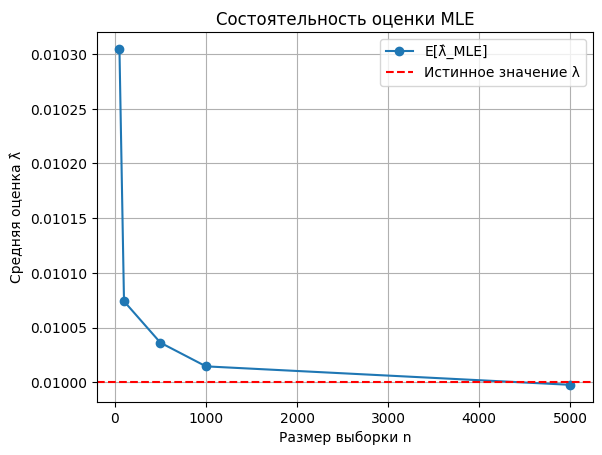

In [35]:

# --- Проверка свойств ---
# Несмещённость и состоятельность можно проиллюстрировать моделированием
n_values = [50, 100, 500, 1000, 5000]
mle_estimates = []

for n in n_values:
    estimates = []
    for _ in range(1000):
        sample = np.random.exponential(scale=100, size=n)
        estimates.append(1 / np.mean(sample))
    mle_estimates.append(np.mean(estimates))

plt.plot(n_values, mle_estimates, marker='o', label='E[λ̂_MLE]')
plt.axhline(1/100, color='red', linestyle='--', label='Истинное значение λ')
plt.xlabel('Размер выборки n')
plt.ylabel('Средняя оценка λ̂')
plt.title('Состоятельность оценки MLE')
plt.legend()
plt.grid(True)
plt.show()

In [32]:

# --- Проверка асимптотической нормальности ---
# Для большого n распределение sqrt(n)*(λ̂ - λ) примерно нормально
n = 1000
sample = np.random.exponential(scale=100, size=n)
lambda_hat = 1 / np.mean(sample)
z = np.sqrt(n) * (lambda_hat - 1/100) / (1/100)
print(f"Z = {z:.3f} (приближается к N(0,1) при больших n)")


Z = 1.375 (приближается к N(0,1) при больших n)
